# original_data_preprocessing_and_visualization
general model用に作成したhysysのoutputデータを読み込み前処理と可視化を行う

In [1]:
import sys, os, math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '../output/dataset_hysys_output.csv'
df_raw = pd.read_csv(path)
print(df_raw.shape)

(755018, 86)


In [3]:
df_raw.columns = [
    'ID','Checkout','Done','Host','Time','FEED_N2','FEED_C1','FEED_C2','FEED_C3','FEED_iC4','FEED_nC4',
    'MR_N2','MR_C1','MR_C2','MR_C3','MR_C4','AmbTemp','CW_Temp','Feed_Press','Feed_Temp','MCHE_WB_Out_Temp','MCHE_CB_Out_Temp',
    'LPMR_Suc_Press','HPMR_Dis_Press','Cooler_Out_Temp_AFC','Cooler_Out_Temp_CW','MCHE_WB_DT','MR_HT_Eff','Cond_Out_Temp_AFC',
    'Sub_Out_Temp_AFC','Cond_Out_Temp_CW','Sub_Out_Temp_CW','pre_MR_VL','MCHE_IN_T','MCHE_IN_C_T','MCHE_MID_C_T','MCHE_OUT_C_T',
    'MCHE_OUT_P','MCHE_SEP_T','LPMR_Dis_Press','MPMR_Suc_Press','MPMR_Dis_Press','HPMR_Suc_Press','LPMR_Suc_Temp','LPMR_Dis_Temp',
    'MPMR_Suc_Temp','MPMR_Dis_Temp','HPMR_Suc_Temp','HPMR_Dis_Temp','WB_UA','CB_UA','C3_GT_Power','LPMR_GT_Power','MPMR_GT_Power',
    'HPMR_GT_Power','FEED_MassFlow','FEED_LHV','LNG_Rundown','LNG_Dens','EFG','EFG_LHV','LNG_Prod','LNG_LHV','COND_Prod','COND_LHV',
    'SpecPower','ThermalEff','FFF_Flow','GT_Eff','MR_FLOW','MR_GASFLOW','MR_SUCT_VL','LMR_FLOW','LMR_GASFLOW','HMR_FLOW','HMR_VFLOW',
    'C3_FLOW','WB_LMTD','WB_Min','CB_LMTD','CB_Min','UA_Rate','Error','Feasible','Note','flg'
    ]

In [4]:
# Pre-processing_1
df_raw = df_raw[(df_raw['Error'] == 0) & (df_raw['Done'] == 1)] # Errorなく計算完了
df_raw = df_raw[df_raw['MR_SUCT_VL'] > 0.98] # MR Comp Suction Vapor Fraction
df_raw.reset_index(inplace=True, drop=True) # Indexを振りなおす
df_raw.describe()

,ID,Checkout,Done,Time,FEED_N2,FEED_C1,FEED_C2,FEED_C3,FEED_iC4,FEED_nC4,MR_N2,MR_C1,MR_C2,MR_C3,MR_C4,AmbTemp,CW_Temp,Feed_Press,Feed_Temp,MCHE_WB_Out_Temp,MCHE_CB_Out_Temp,LPMR_Suc_Press,HPMR_Dis_Press,Cooler_Out_Temp_AFC,Cooler_Out_Temp_CW,MCHE_WB_DT,MR_HT_Eff,Cond_Out_Temp_AFC,Sub_Out_Temp_AFC,Cond_Out_Temp_CW,Sub_Out_Temp_CW,pre_MR_VL,MCHE_IN_T,MCHE_IN_C_T,MCHE_MID_C_T,MCHE_OUT_C_T,MCHE_OUT_P,MCHE_SEP_T,LPMR_Dis_Press,MPMR_Suc_Press,MPMR_Dis_Press,HPMR_Suc_Press,LPMR_Suc_Temp,LPMR_Dis_Temp,MPMR_Suc_Temp,MPMR_Dis_Temp,HPMR_Suc_Temp,HPMR_Dis_Temp,WB_UA,CB_UA,C3_GT_Power,LPMR_GT_Power,MPMR_GT_Power,HPMR_GT_Power,FEED_MassFlow,FEED_LHV,LNG_Rundown,LNG_Dens,EFG,EFG_LHV,LNG_Prod,LNG_LHV,COND_Prod,COND_LHV,SpecPower,ThermalEff,FFF_Flow,GT_Eff,MR_FLOW,MR_GASFLOW,MR_SUCT_VL,LMR_FLOW,LMR_GASFLOW,HMR_FLOW,HMR_VFLOW,C3_FLOW,WB_LMTD,WB_Min,CB_LMTD,CB_Min,UA_Rate,Error,Feasible,flg
count,351418.000000,351418.0,351418.0,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.00000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,3.514180e+05,3.514180e+05,351418.000000,351418.000000,351418.000000,351418.000000,3.514180e+05,351418.000000,3.514180e+05,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,351418.0,351418.000000,351418.000000,351418.000000,351418.000000,351418.000000,3.514180e+05,3.514180e+05,351418.000000,351418.000000,351418.000000,3.514180e+05,351418.000000,3.514180e+05,3.514180e+05,351418.000000,3.514180e+05,351418.000000,3.514180e+05,351418.0,351418.000000,351418.0
mean,499805.570409,0.0,1.0,56.757847,3.634661,90.175562,3.756764,1.938038,0.164992,0.329983,11.840435,36.828684,35.626177,14.988052,0.716652,25.27538,29.986034,65.285550,22.500714,-132.730009,-153.972217,3.293025,56.805976,35.272220,35.981556,3.977978,41.120028,45.302817,35.309342,39.983855,32.985842,0.327317,-34.284010,-38.263498,-135.862089,-165.230162,43.785550,-34.364278,17.958808,17.458808,31.743287,31.243287,-38.476575,67.763170,35.272220,75.990419,35.272220,77.766966,3.326285e+12,1.780449e+11,50820.285540,64233.221287,24584.800058,23001.200770,6.452378e+05,46778.230560,6.452378e+05,448.522047,60925.624567,30514.292103,584312.212114,48579.713135,0.0,46778.230560,278.458885,0.912141,12258.492944,0.298307,1.342084e+06,1.117711e+06,0.999795,351922.559793,353179.988408,9.901615e+05,1689.636815,1.924152e+06,2.885802e+00,-1.928295,7.538693e+00,-2.600018,5.997180e+04,0.0,0.032437,0.0
std,288638.817385,0.0,0.0,22.652195,2.238816,2.979278,2.254662,1.173836,0.105183,0.210365,4.021155,4.096452,3.705334,3.539441,0.460536,8.85380,5.915157,8.679392,7.361956,4.363922,5.721450,0.846043,7.014812,9.360755,6.651327,1.752429,28.262176,9.374929,9.837019,6.643376,6.905134,0.098791,2.039780,2.672647,5.740058,4.805622,8.679392,2.039135,2.121981,2.121981,3.858146,3.858146,2.683685,19.311655,9.360755,9.716089,9.360755,9.667434,1.659600e+13,1.836565e+12,9122.909475,14827.065789,3347.859127,3391.189430,3.492465e-10,1710.913544,3.546692e-10,13.097929,28647.695671,9058.955280,28647.695731,624.823749,0.0,1710.913544,39.061218,0.011893,21625.689536,0.005708,1.434708e+05,1.329453e+05,0.001613,146725.489912,143530.433746,6.389156e+04,117.958570,2.993964e+05,1.664486e+01,4.799495,8.596636e+00,32.163108,6.607518e+05,0.0,0.177158,0.0
min,3.000000,0.0,1.0,6.694636,0.000000,85.000000,0.000000,0.000000,0.000000,0.000000,2.000000,30.000000,30.000000,10.000000,0.000000,10.00000,20.000000,50.000000,10.000000,-140.000000,-165.000000,2.000000,45.000000,15.000000,21.000000,1

UA抽出結果 

データ数 351418 → 137772 

WB_UA 最小値:  4.33e+04 → 1.00e+07
WB_UA 最頻値:  3.35e+07 → 3.35e+07
WB_UA 中央値:  3.48e+08 → 3.85e+07
WB_UA 平均値:  3.33e+12 → 4.66e+07
WB_UA 最大値:  2.90e+14 → 1.50e+08 

CB_UA 最小値:  8.32e+03 → 1.15e+05
CB_UA 最頻値:  1.65e+06 → 1.39e+06
CB_UA 中央値:  2.70e+06 → 1.69e+06
CB_UA 平均値:  1.78e+11 → 2.22e+06
CB_UA 最大値:  6.88e+13 → 1.00e+07 



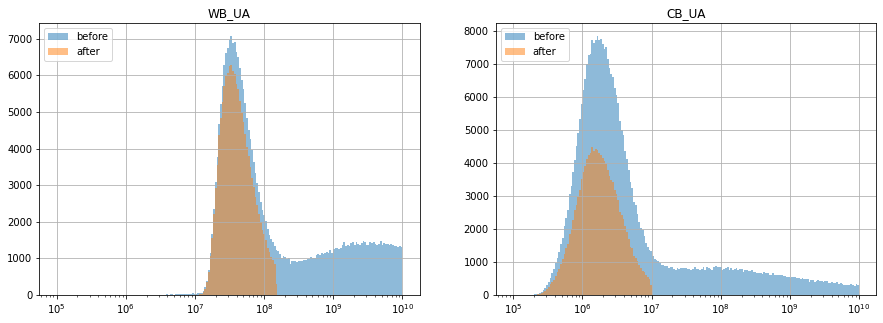

In [5]:
# Pre-processing_2 UA Extraction
UA_list = ['WB_UA', 'CB_UA']

df = df_raw.copy()

# UAの外れ値を除外
df = df[(df['WB_UA'] > 1 * 10**7) & (df['WB_UA'] < 1.5 * 10**8)]
df = df[(df['CB_UA'] > 1 * 10**5) & (df['CB_UA'] < 1 * 10**7)]
df.reset_index(inplace=True, drop=True) # Indexを振りなおす

print("UA抽出結果","\n")
print("データ数", df_raw.shape[0], "→", df.shape[0],"\n")

# 可視化
num_row = math.ceil(len(df.loc[:, UA_list].columns) / 2)

plt.figure(figsize=(15, 5 * num_row))
i = 0

for tag in df.loc[:, UA_list].columns:
    i += 1
    plt.subplot(num_row, 2, i)
    n_raw, bins_raw, patches_raw = plt.hist(x=df_raw[tag], bins=np.logspace(5, 10, 200), alpha=0.5, label="before")
    n, bins, patches = plt.hist(df[tag], bins=np.logspace(5, 10, 200), alpha=0.5, label="after")
    plt.legend(loc="upper left")
    plt.xscale('log')
    plt.grid()
    plt.title(label=tag)
    mode_index_raw = n_raw.argmax()
    mode_index = n.argmax()
    print(tag, '最小値: ', f"{df_raw[tag].min():.2e}", "→", f"{df[tag].min():.2e}")
    print(tag, '最頻値: ', f"{(bins_raw[mode_index_raw] + bins[mode_index_raw+1])/2:.2e}", "→", f"{(bins[mode_index] + bins[mode_index+1])/2:.2e}")
    print(tag, '中央値: ', f"{df_raw[tag].median():.2e}", "→", f"{df[tag].median():.2e}")
    print(tag, '平均値: ', f"{df_raw[tag].mean():.2e}", "→", f"{df[tag].mean():.2e}")
    print(tag, '最大値: ', f"{df_raw[tag].max():.2e}", "→", f"{df[tag].max():.2e}","\n")


plt.show()



# General Plant Model用の処理

作成したDatasetをGeneral Plant Modelに適用するために元のDSLNGベースのThermal Efficiency, SpecPower, FFFの計算を更新する。  
DSLNGベースの値はDSLNGベースである旨が分かるように列名を変更する。

### 0. DSLNGベースのデータの列名の変更

In [6]:
# BOG量計算
df["SpecPower_DSLNG"] = df["SpecPower"].copy()
df["ThermalEff_DSLNG"] = df["ThermalEff"].copy()
df["FFF_Flow_DSLNG"] = df["FFF_Flow"].copy()

### 1. Rundown回帰モデルで更新の際に使用する値の用意

In [7]:
# BOG (Tank入熱由来)
Boil_off_Rate = 0.06 # [%vol / day], Exxon EMP2 Project Design Basis参照 ("BOG not more than 0.06% per day"）
LNG_Tank_Capacity = 150*1000 # 150 km3 をTake (PNGは160 km3, RGXは140 km3)
df["BOG"] = Boil_off_Rate / 100 * LNG_Tank_Capacity / 24 * df["LNG_Dens"] # kg/hr

# Heat Rate
GT_heatrate = 11000 # 11,000 kJ/kWh をTake。SDBにつき温度や回転数補正かけない (参考 Design Heatrate - DSLNG: 11893, QGX: 10960, PNG: 9011)

# 各熱量計算
df["liquefaction_feed_heat"] = df["FEED_MassFlow"] * df["FEED_LHV"]
df["LNG_heat"] = df["LNG_Prod"] * df["LNG_LHV"]
df["EFG_heat"] = df["EFG"] * df["EFG_LHV"]
df["BOG_heat"] = df["BOG"] * df["EFG_LHV"]
df["Cond_heat"] = df["COND_Prod"] * df["COND_LHV"] # General Modelでは0

# Compressor Total Power and Heat
df["comp_power_total"] = df['C3_GT_Power'] + df['LPMR_GT_Power'] + df['MPMR_GT_Power'] + df['HPMR_GT_Power']
comp_heat = df["comp_power_total"] * GT_heatrate #kJ/h, CompressorへのFuel必要熱量

### 2. Rundown回帰モデルでの計算

作成したRundownモデルを使用して各プラントのRundown構造に応じたLNG生産量, Thermal Efficiency, SpecPowerを求める  
model_1: Direct Rundown - JT  
model_2: Direct Rundown - HT  
model_3: EFG Drum, EFG Pump あり

In [8]:
# モデルの読み込み
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model

# Load AI models
model_1 = load_model('../AImodel/lng_rundown/case_1.h5')
model_2 = load_model('../AImodel/lng_rundown/case_2.h5')
model_3 = load_model('../AImodel/lng_rundown/case_3.h5')

# Load Scaler used for Model
import pickle
sc_in_1 = pickle.load(open('../AImodel/lng_rundown/case_1_scaler_input.pkl', "rb"))
sc_out_1 = pickle.load(open('../AImodel/lng_rundown/case_1_scaler_output.pkl',"rb"))
sc_in_2 = pickle.load(open('../AImodel/lng_rundown/case_2_scaler_input.pkl', "rb"))
sc_out_2 = pickle.load(open('../AImodel/lng_rundown/case_2_scaler_output.pkl',"rb"))
sc_in_3 = pickle.load(open('../AImodel/lng_rundown/case_3_scaler_input.pkl', "rb"))
sc_out_3 = pickle.load(open('../AImodel/lng_rundown/case_3_scaler_output.pkl',"rb"))

# 回帰用の関数
def prediction(input_df, model, scaler_in, scaler_out):
    x = input_df.values
    x_std = scaler_in.transform(x)
    y_pred = model.predict(x_std)
    y = scaler_out.inverse_transform(y_pred)
    return pd.DataFrame(y)

In [9]:
# 回帰モデルに使用するベース(必要に応じて実運転データで置き換える)
Tank_inlet_P = 1.05 #kg/cm2
LNG_HT_Outlet_P = 7.00 #kg/cm2
EFG_P = 1.5 #kg/cm2
EFG_Pump_Disc_P = 10 #kg/cm2

In [10]:
# 回帰計算

# ModelのInput用意
input_df_1 = df[["FEED_N2", "FEED_C1", "FEED_C2", "FEED_C3", "MCHE_OUT_P", "MCHE_CB_Out_Temp"]]
input_df_1["Tank_P"] = Tank_inlet_P

input_df_2 = input_df_1.copy()
input_df_2["HT_Outlet_P"] = LNG_HT_Outlet_P

input_df_3 = input_df_2.copy()
input_df_3["EFG_P"] = EFG_P
input_df_3["EFG_Pump_P"] = EFG_Pump_Disc_P

# 回帰
pred_1 = prediction(input_df_1, model_1, sc_in_1, sc_out_1)
pred_2 = prediction(input_df_2, model_2, sc_in_2, sc_out_2)
pred_3 = prediction(input_df_3, model_3, sc_in_3, sc_out_3)


In [11]:
# モデル予測結果をdfに格納

# df.reset_index(inplace=True, drop=True)
for i, pred in enumerate([pred_1, pred_2, pred_3]):
    df["EFG_{}".format(i+1)] = pred[0] * df["LNG_Rundown"]
    df["EFG_LHV_{}".format(i+1)] = pred[1]
    df["LNG_Prod_{}".format(i+1)] = pred[2] * df["LNG_Rundown"]
    df["LNG_LHV_{}".format(i+1)] = pred[3]

# Case3はEFG DrumでのEFGもあるため、これを加味したEFGに置き換える
df["EFG_Drum_3"] = pred_3[4] * df["LNG_Rundown"]
df["EFG_Drum_LHV_3"] = pred_3[5]
df["EFG_LHV_3"] = (df["EFG_LHV_3"] * df["EFG_3"] + df["EFG_Drum_LHV_3"] * df["EFG_Drum_3"]) / (df["EFG_3"] + df["EFG_Drum_3"])
df["EFG_3"] += df["EFG_Drum_3"]


# Thermal Efficiency, SpecPowerの計算
for i in range(1,4):
    df["LNG_heat_{}".format(i)] = df["LNG_Prod_{}".format(i)] * df["LNG_LHV_{}".format(i)]
    df["EFG_heat_{}".format(i)] = df["EFG_{}".format(i)] * df["EFG_LHV_{}".format(i)]
    df["BOG_heat_{}".format(i)] = df["BOG"] * df["EFG_LHV_{}".format(i)]

    # FFF計算
    FFF_heat = comp_heat - df["EFG_heat_{}".format(i)] - df["BOG_heat_{}".format(i)]

    # EFGが過多で、FFFが負となる場合はEFGが一部Flaringしているとみなす
    FFF_heat_act = FFF_heat.copy()
    FFF_heat_act[FFF_heat_act<= 0] = 0

    # FFF量をdfに追加
    df["FFF_Flow_{}".format(i)] = FFF_heat / df["FEED_LHV"]
    df["FFF_Flow_act_{}".format(i)] = FFF_heat_act / df["FEED_LHV"]


    # Thermal Efficiencyをdfに追加
    ThermalEff = (df["LNG_heat_{}".format(i)] + df["Cond_heat"] - df["BOG_heat_{}".format(i)]) / (FFF_heat_act + df["liquefaction_feed_heat"])
    df["ThermalEff_{}".format(i)] = ThermalEff

    # Specific Powerをdfに追加
    SpecPower = df["comp_power_total"] / df["LNG_Prod_{}".format(i)] * 1000
    df["SpecPower_{}".format(i)] = SpecPower    
    
#     以下のコードは各GTごとのheatrateでthermaleffを計算しなおす処理であるがGTの汎用化対応により不要となった。
#     # 20210202 追加 
#     # Thermal Efficiency - 高効率GTケース (PNG: PGT25+G4, Heatrate 9011kJ/kWh) をdfに追加

#     # FFF計算
#     _FFF_heat = comp_heat/GT_heatrate*9011 - EFG_heat - BOG_heat

#     # EFGが過多で、FFFが負となる場合はEFGが一部Flaringしているとみなす
#     _FFF_heat_act = _FFF_heat.copy()
#     _FFF_heat_act[_FFF_heat_act<= 0] = 0

#     # FFF量をdfに追加
#     df["FFF_Flow_PGT25_{}".format(i)] = _FFF_heat / df["FEED_LHV"]
#     df["FFF_Flow_PGT25_act_{}".format(i)] = _FFF_heat_act / df["FEED_LHV"]
    
#     # Thermal Efficiency
#     _ThermalEff = (LNG_heat + Cond_heat - BOG_heat) / (_FFF_heat_act + df["liquefaction_feed_heat"])
#     df["ThermalEff_PGT25_{}".format(i)] = _ThermalEff

    
#     # 20210204 追加 
#     # Thermal Efficiency - 低効率GTケース (DSLNG: ms5002d, Heatrate 11893kJ/kWh) をdfに追加

#     # FFF計算
#     __FFF_heat = comp_heat/GT_heatrate*11893 - EFG_heat - BOG_heat

#     # EFGが過多で、FFFが負となる場合はEFGが一部Flaringしているとみなす
#     __FFF_heat_act = __FFF_heat.copy()
#     __FFF_heat_act[__FFF_heat_act<= 0] = 0

#     # FFF量をdfに追加
#     df["FFF_Flow_MS5002_{}".format(i)] = __FFF_heat / df["FEED_LHV"]
#     df["FFF_Flow_MS5002_act_{}".format(i)] = __FFF_heat_act / df["FEED_LHV"]
    
#     # Thermal Efficiency
#     __ThermalEff = (LNG_heat + Cond_heat - BOG_heat) / (__FFF_heat_act + df["liquefaction_feed_heat"])
#     df["ThermalEff_MS5002_{}".format(i)] = __ThermalEff 


## データ集計と可視化

In [12]:
df.describe()

,ID,Checkout,Done,Time,FEED_N2,FEED_C1,FEED_C2,FEED_C3,FEED_iC4,FEED_nC4,MR_N2,MR_C1,MR_C2,MR_C3,MR_C4,AmbTemp,CW_Temp,Feed_Press,Feed_Temp,MCHE_WB_Out_Temp,MCHE_CB_Out_Temp,LPMR_Suc_Press,HPMR_Dis_Press,Cooler_Out_Temp_AFC,Cooler_Out_Temp_CW,MCHE_WB_DT,MR_HT_Eff,Cond_Out_Temp_AFC,Sub_Out_Temp_AFC,Cond_Out_Temp_CW,Sub_Out_Temp_CW,pre_MR_VL,MCHE_IN_T,MCHE_IN_C_T,MCHE_MID_C_T,MCHE_OUT_C_T,MCHE_OUT_P,MCHE_SEP_T,LPMR_Dis_Press,MPMR_Suc_Press,MPMR_Dis_Press,HPMR_Suc_Press,LPMR_Suc_Temp,LPMR_Dis_Temp,MPMR_Suc_Temp,MPMR_Dis_Temp,HPMR_Suc_Temp,HPMR_Dis_Temp,WB_UA,CB_UA,C3_GT_Power,LPMR_GT_Power,MPMR_GT_Power,HPMR_GT_Power,FEED_MassFlow,FEED_LHV,LNG_Rundown,LNG_Dens,EFG,EFG_LHV,LNG_Prod,LNG_LHV,COND_Prod,COND_LHV,SpecPower,ThermalEff,FFF_Flow,GT_Eff,MR_FLOW,MR_GASFLOW,MR_SUCT_VL,LMR_FLOW,LMR_GASFLOW,HMR_FLOW,HMR_VFLOW,C3_FLOW,WB_LMTD,WB_Min,CB_LMTD,CB_Min,UA_Rate,Error,Feasible,flg,SpecPower_DSLNG,ThermalEff_DSLNG,FFF_Flow_DSLNG,BOG,liquefaction_feed_heat,LNG_heat,EFG_heat,BOG_heat,Cond_heat,comp_power_total,EFG_1,EFG_LHV_1,LNG_Prod_1,LNG_LHV_1,EFG_2,EFG_LHV_2,LNG_Prod_2,LNG_LHV_2,EFG_3,EFG_LHV_3,LNG_Prod_3,LNG_LHV_3,EFG_Drum_3,EFG_Drum_LHV_3,LNG_heat_1,EFG_heat_1,BOG_heat_1,FFF_Flow_1,FFF_Flow_act_1,ThermalEff_1,SpecPower_1,LNG_heat_2,EFG_heat_2,BOG_heat_2,FFF_Flow_2,FFF_Flow_act_2,ThermalEff_2,SpecPower_2,LNG_heat_3,EFG_heat_3,BOG_heat_3,FFF_Flow_3,FFF_Flow_act_3,ThermalEff_3,SpecPower_3
count,137772.000000,137772.0,137772.0,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,1.377720e+05,1.377720e+05,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,1.377720e+05,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.0,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,1.377720e+05,1.377720e+05,137772.000000,137772.000000,137772.000000,1.377720e+05,137772.000000,1.377720e+05,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.0,137772.000000,137772.0,137772.000000,137772.000000,137772.000000,137772.000000,1.377720e+05,1.377720e+05,1.377720e+05,1.377720e+05,137772.0,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,137772.000000,1.377720e+05,1.377720e+05,1.377720e+05,137772.000000,137772.000000,137772.000000,137772.000000,1.377720e+05,1.377720e+05,1.377720e+05,137772.000000,137772.000000,137772.000000,137772.000000,1.377720e+05,1.377720e+05,1.377720e+05,137772.000000,137772.000000,137772.000000,137772.000000
mean,499630.395305,0.0,1.0,58.007791,3.467763,90.054169,3.963739,2.013112,0.167072,0.334145,13.004571,38.133367,35.037003,13.138680,0.686378,25.396804,29.982304,66.601555,22.509374,-132.895340,-152.820589,2.917093,57.852499,35.400931,35.982569,4.077130,41.432889,45.444375,35.442837,39.976262,32.974171,0.376666,-34.232374,-38.310806,-139.036927,-165.722493,45.101555,-34.313577,18.275381,17.775381,32.318874,31.818874,-38.505265,78.529523,35.400931,76.816239,35.400931,78.480845,4.662841e+07,2.219934e+06,52056.494647,74159.646087,25943.270429,24387.043449,645237.836632,46898.769519,6.452378e+05,447.336219,63624.907820,31807.574574,581612.928878,48665.975391,0.0,46898.769519,303.539852,0.907708,12005.777211,0.298230,1.384622e+06,1.172670e+06,0.999986,421469.308188,423099.197120,9.631526e+05,1647.910700,1.944860e+06,5.907705,2.2

In [13]:
X_list = df.columns[5:82].values.tolist() + df.columns[86:].values.tolist()

# X_list = [
#     'FEED_N2','FEED_C1','FEED_C2','FEED_C3','FEED_iC4','FEED_nC4',
#     'MR_N2','MR_C1','MR_C2','MR_C3','MR_C4',
#     'AmbTemp','CW_Temp','Feed_Press','Feed_Temp','MCHE_WB_Out_Temp','MCHE_CB_Out_Temp',
#     'LPMR_Suc_Press','HPMR_Dis_Press','Cooler_Out_Temp_AFC','MCHE_WB_DT','MR_HT_Eff','Cond_Out_Temp_AFC',
#     'Sub_Out_Temp_AFC','MCHE_IN_T','MCHE_IN_C_T','MCHE_MID_C_T','MCHE_OUT_C_T',
#     'MCHE_OUT_P','MCHE_SEP_T','LPMR_Dis_Press','MPMR_Suc_Press','MPMR_Dis_Press','HPMR_Suc_Press','LPMR_Suc_Temp','LPMR_Dis_Temp',
#     'MPMR_Suc_Temp','MPMR_Dis_Temp','HPMR_Suc_Temp','HPMR_Dis_Temp','WB_UA','CB_UA',"LNG_Rundown", 'comp_power_total', 'LNG_Dens',
#     'SpecPower','ThermalEff','FFF_Flow', "FFF_Flow_act", 'GT_Eff','MR_FLOW','MR_GASFLOW','MR_SUCT_VL','LMR_FLOW','LMR_GASFLOW','HMR_FLOW','HMR_VFLOW',
#     'C3_FLOW', "FEED_MassFlow","FEED_LHV", "BOG", #"Cond_heat"
#     "FFF_Flow_DSLNG","FFF_Flow_1", "FFF_Flow_act_1", "FFF_Flow_2", "FFF_Flow_act_2", "FFF_Flow_3", "FFF_Flow_act_3",
#     "SpecPower_DSLNG", "ThermalEff_DSLNG", "SpecPower_1", "ThermalEff_1", "SpecPower_2", "ThermalEff_2", "SpecPower_3", "ThermalEff_3",
#     "FFF_Flow_PGT25_1", "FFF_Flow_PGT25_act_1", "FFF_Flow_PGT25_2", "FFF_Flow_PGT25_act_2", "FFF_Flow_PGT25_3", "FFF_Flow_PGT25_act_3",
#     "ThermalEff_PGT25_1", "ThermalEff_PGT25_2", "ThermalEff_PGT25_3",
#     "FFF_Flow_MS5002_1", "FFF_Flow_MS5002_act_1", "FFF_Flow_MS5002_2", "FFF_Flow_MS5002_act_2", "FFF_Flow_MS5002_3", "FFF_Flow_MS5002_act_3",
#     "ThermalEff_MS5002_1", "ThermalEff_MS5002_2", "ThermalEff_MS5002_3",
#     ]

df = df.loc[:, X_list]

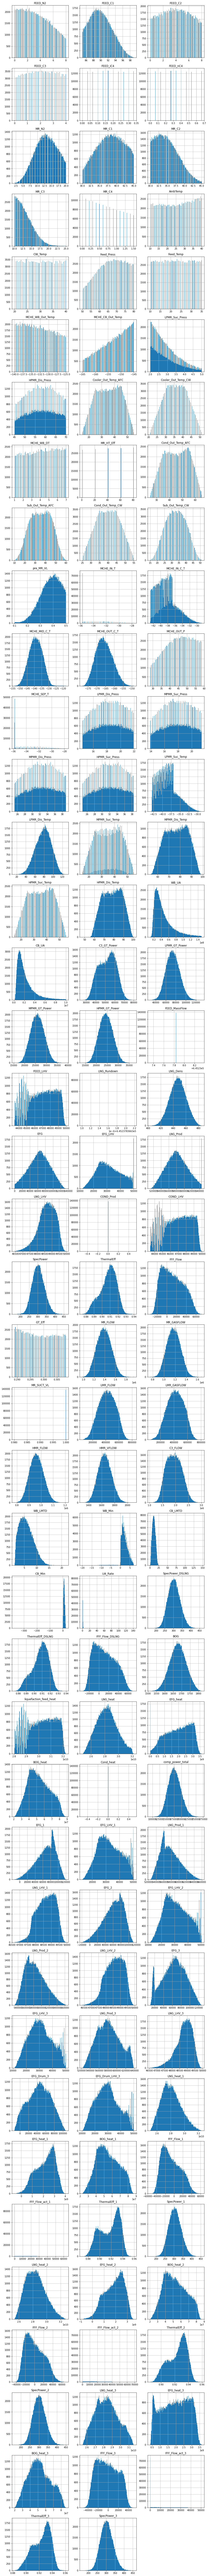

In [14]:
num_row = math.ceil(len(df.columns) / 3)

plt.figure(figsize=(15, 5 * num_row))
i = 0

for tag in df.columns:
    i += 1
    
    plt.subplot(num_row, 3, i)
    plt.hist(x=df[tag], bins=200)
    plt.grid()
    plt.title(label=tag)

plt.show()

In [15]:
df.to_pickle('../output/dataset_preprocessed.pkl')
print(df.shape)

(137772, 122)


In [18]:
k = 12000  # 1DataFrameあたりの行数
dfs = [df.loc[i:i+k-1, :] for i in range(0, len(df), k)]
for i, df_i in enumerate(dfs):
    fname = '../output/dataset_preprocessed_{}.pkl'.format(i)
    df_i.to_pickle(fname)